In [21]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# for PCA Analysis
from sklearn.decomposition import PCA 

# model
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 

In [22]:
from sklearn import datasets

main_data = datasets.load_breast_cancer()
print(main_data)

print("\n\nShapes of data feature and target\n")
print(main_data.data.shape)
print(main_data.target.shape)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [23]:
# analysing the features of data

print(main_data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [26]:
# targets 
# 0 = benign
# 1 = malignant

print(main_data.target_names)

['malignant' 'benign']


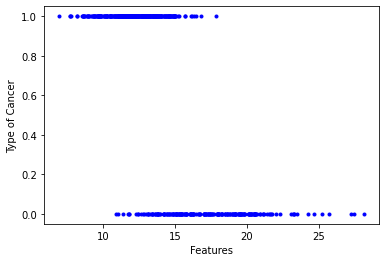

In [27]:
plt.scatter(main_data.data[:, 0], main_data.target, c = 'blue', marker='.')
plt.xlabel('Features')
plt.ylabel('Type of Cancer')
plt.show()

In [28]:
# create a model
kmeans = KMeans(n_clusters = 4, random_state = 75)

# prediction
prediction = kmeans.fit_predict(main_data.data)
print(prediction)

[3 3 3 2 3 0 3 0 0 0 0 0 3 0 0 0 0 3 1 0 2 2 0 1 3 3 0 3 0 3 3 0 3 3 0 0 0
 2 0 0 0 2 3 0 0 3 2 0 2 0 2 0 2 3 0 2 3 0 2 2 2 2 0 2 0 0 2 2 2 2 3 2 3 0
 2 0 2 3 3 2 2 2 1 3 2 3 0 3 2 0 0 0 0 0 0 3 2 2 2 0 0 2 2 2 2 0 2 2 1 2 2
 2 0 2 2 2 2 0 0 3 2 3 1 0 2 0 0 3 0 3 2 0 0 0 3 2 2 2 0 2 2 0 2 2 2 2 2 0
 0 0 2 2 2 2 0 2 3 0 2 2 2 3 3 2 1 0 2 3 3 0 2 0 0 2 2 2 2 0 2 2 1 3 0 2 0
 2 3 2 2 2 0 2 2 0 0 2 0 3 3 0 2 3 3 0 2 0 2 0 2 0 3 2 1 0 0 0 2 2 3 1 0 0
 2 0 0 0 2 0 2 0 0 2 2 3 2 0 1 3 0 3 0 2 2 0 3 2 2 2 2 2 3 2 3 3 3 0 3 0 0
 0 3 3 3 0 3 1 2 0 2 2 0 2 1 2 3 2 2 3 0 0 3 2 3 0 2 2 2 2 2 2 0 0 2 2 2 0
 2 2 0 2 3 2 3 2 2 2 2 2 0 0 2 0 2 2 2 2 2 3 2 2 2 3 2 3 2 2 0 2 0 0 0 2 2
 2 2 3 2 3 2 1 0 2 2 3 2 2 2 0 2 2 2 0 1 0 2 2 2 0 2 2 2 2 2 0 0 3 3 2 1 1
 0 0 3 3 0 0 2 0 0 2 2 2 2 2 2 0 2 0 2 3 2 2 3 3 2 0 0 2 2 2 3 2 2 2 2 2 0
 2 3 2 2 2 2 0 0 2 2 3 2 2 2 0 2 0 2 2 2 2 2 2 0 2 3 3 0 0 2 0 0 0 2 3 0 2
 3 2 3 0 0 3 2 3 2 0 2 0 2 2 2 2 3 1 0 2 0 0 0 2 3 2 2 2 0 2 2 2 0 0 2 0 2
 0 0 0 0 2 0 3 2 0 2 3 3 

In [29]:
# shapes of clusters

print("\n\nshapes of clustering!!!!\n\n")
print(kmeans.cluster_centers_.shape)

print("\n\nclusters\n\n")
print(kmeans.cluster_centers_)



shapes of clustering!!!!


(4, 30)


clusters


[[1.45225414e+01 1.94853591e+01 9.47017680e+01 6.54760773e+02
  9.63986740e-02 1.10806519e-01 9.33174972e-02 5.08652597e-02
  1.79946409e-01 6.19937017e-02 3.51625414e-01 1.07288950e+00
  2.51445249e+00 3.21568508e+01 6.11319890e-03 2.57552044e-02
  3.16646961e-02 1.20207569e-02 1.82920331e-02 3.54741878e-03
  1.66481768e+01 2.63138674e+01 1.10286851e+02 8.56992265e+02
  1.33448895e-01 2.94730387e-01 3.16295414e-01 1.29223978e-01
  2.98213812e-01 8.65719337e-02]
 [2.34015789e+01 2.27621053e+01 1.56147368e+02 1.72942105e+03
  1.04154211e-01 1.71922105e-01 2.39015789e-01 1.34857895e-01
  1.85884211e-01 5.91452632e-02 1.19100000e+00 1.25407895e+00
  8.56357895e+00 1.91449474e+02 7.10673684e-03 3.64242105e-02
  4.79426316e-02 1.59331579e-02 2.00326316e-02 3.80478947e-03
  2.99315789e+01 3.02952632e+01 2.03073684e+02 2.76584211e+03
  1.41510526e-01 3.89415789e-01 5.05994737e-01 2.27526316e-01
  2.89852632e-01 8.18736842e-02]
 [1.13746604e+01

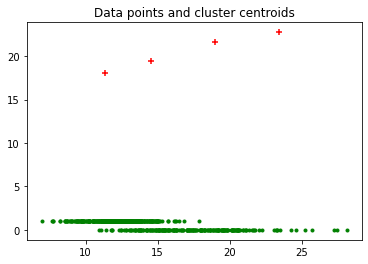

In [30]:
plt.scatter(main_data.data[:, 0], main_data.target, c = 'green', marker = '.')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'red', marker = '+')
plt.title('Data points and cluster centroids')
plt.show()

In [31]:
# import scipy
from scipy.stats import mode

labels = np.zeros_like(prediction)
print(labels)
for _ in range(10):
  temp = (prediction == _)
  print(f"temp :- {temp}")
  labels[temp] = mode(main_data.target[temp])[0]
  print("print mode[0]", mode(main_data.target[temp])[0])
  print(labels[temp])
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(main_data.target, labels)

0.8347978910369068

## 83.47% Accuracy

Text(91.68, 0.5, 'predicted label')

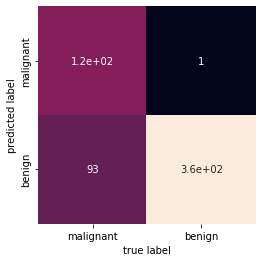

In [33]:
mat = confusion_matrix(main_data.target, labels)
ax = sns.heatmap(mat.T, square = True, annot = True, cbar = False, xticklabels = main_data.target_names, yticklabels = main_data.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label')